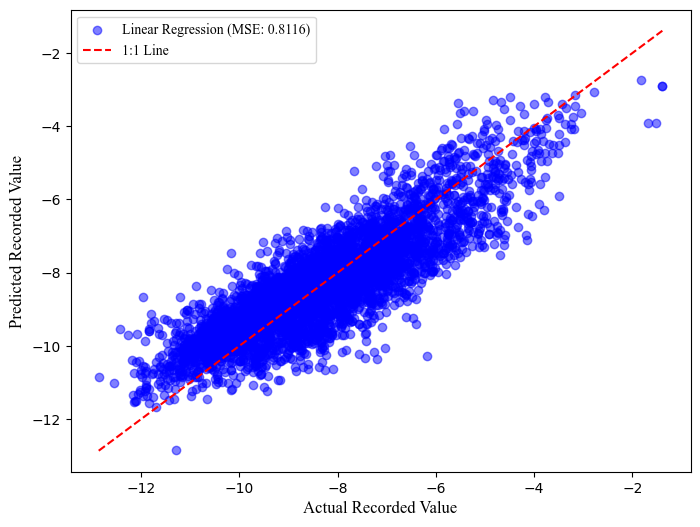

c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


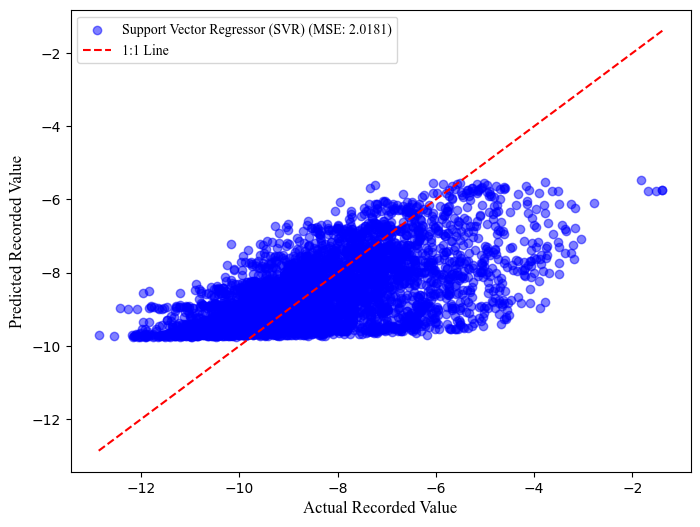

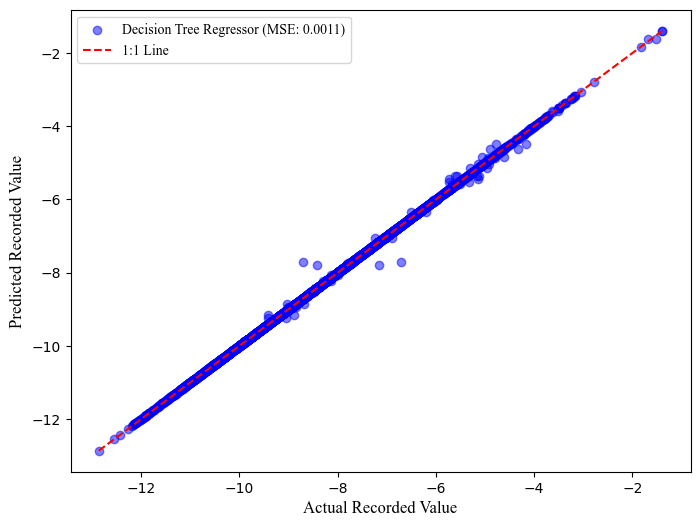

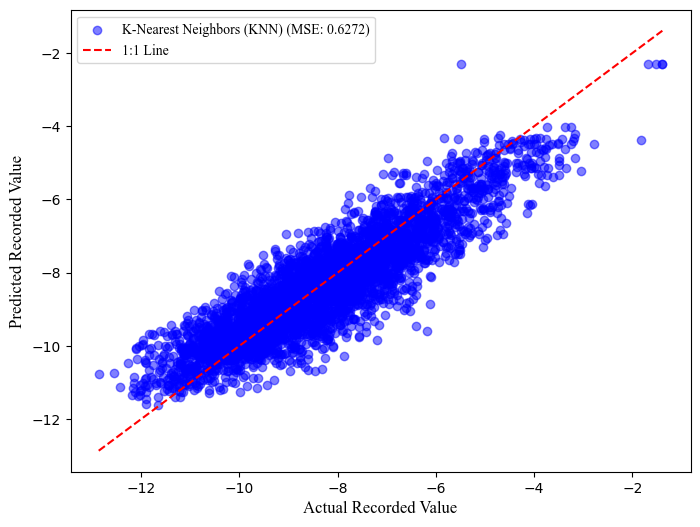

c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


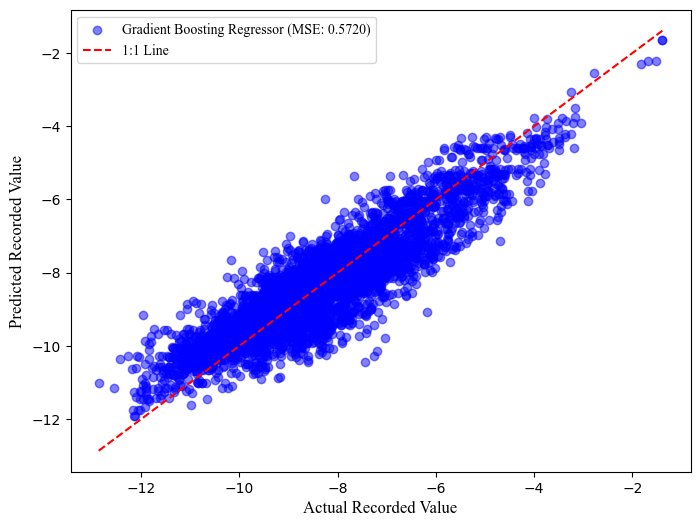

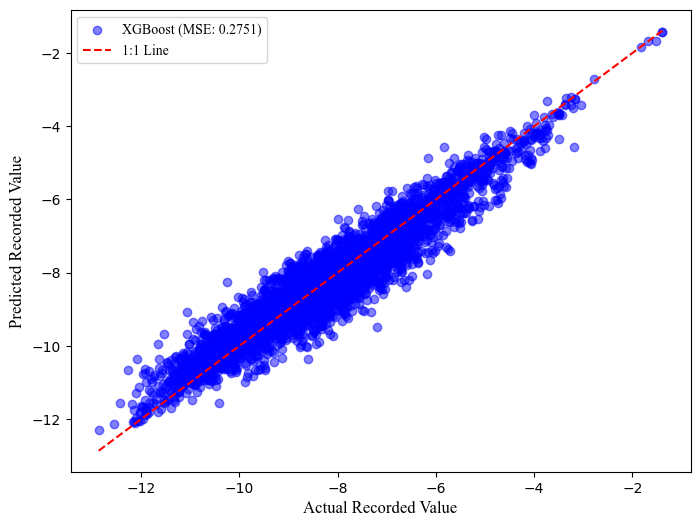

{'Linear Regression': 0.8116069367048608, 'Support Vector Regressor (SVR)': 2.0180987822244423, 'Decision Tree Regressor': 0.0010581933463244858, 'K-Nearest Neighbors (KNN)': 0.6271581699952027, 'Gradient Boosting Regressor': 0.5720069129592991, 'XGBoost': 0.27512550354003906}


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# 파일 경로 지정
file_path = '통합 문서1.xlsx'  # 파일 경로를 실제 파일 경로로 변경하세요.
xls = pd.ExcelFile(file_path)

# 데이터 로드
input_data = pd.read_excel(xls, sheet_name='Ground_Motion_Input_Value_M_R')
output_data = pd.read_excel(xls, sheet_name='RECORDED_VALUE_PGA')

# 로그 변환
output_data_log = np.log(output_data)

# 학습에 사용할 입력 데이터(X)와 출력 데이터(y) 준비
X = input_data
y = output_data_log

# XGBoost 모델을 포함한 다양한 모델들 정의
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# MSE 값을 저장할 딕셔너리
mse_values = {}

# 각 모델을 학습하고 예측 후 MSE 계산
for model_name, model in models.items():
    model.fit(X, y)  # 로그를 씌운 y 값으로 학습
    predictions = model.predict(X)
    mse_values[model_name] = mean_squared_error(y, predictions)
    
    # 1대1 비교 플롯을 위한 점 추가
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions, label=f'{model_name} (MSE: {mse_values[model_name]:.4f})', color='b', alpha=0.5)
    
    # 1대1 라인 (빨간색 선)
    min_val = min(np.min(y), np.min(predictions))
    max_val = max(np.max(y), np.max(predictions))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', label='1:1 Line', linestyle='--')
    
    # 그래프 디자인 설정
    plt.xlabel('Actual Recorded Value', fontsize=12, fontname='Times New Roman')
    plt.ylabel('Predicted Recorded Value', fontsize=12, fontname='Times New Roman')
    plt.legend(fontsize=10, prop={'family': 'Times New Roman'})
    
    # 제목 제외
    plt.show()

# MSE 값 출력
print(mse_values)


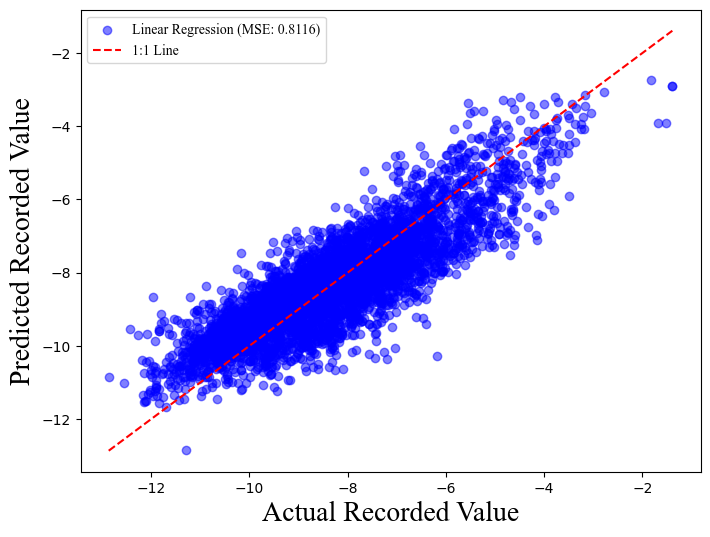

c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


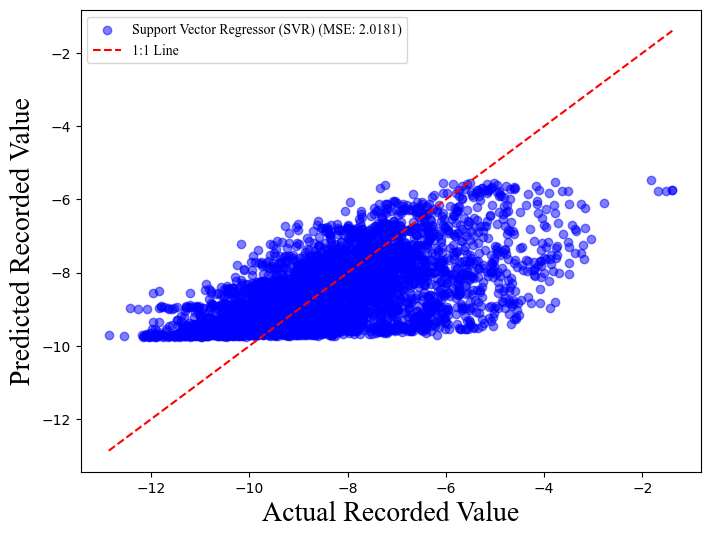

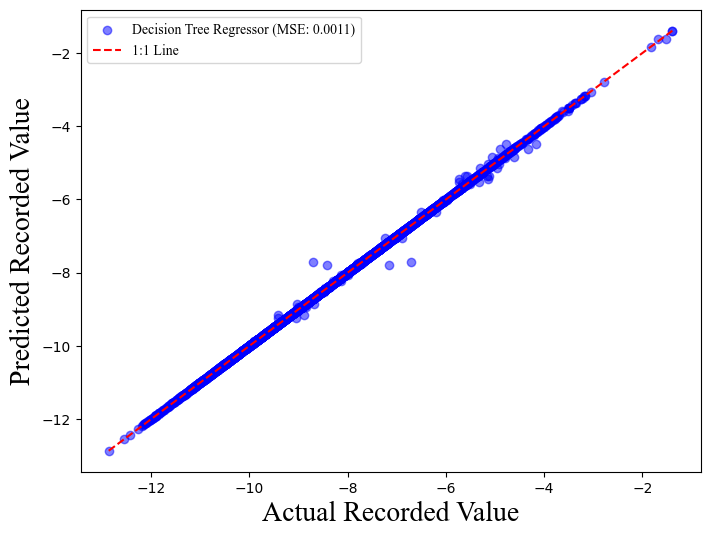

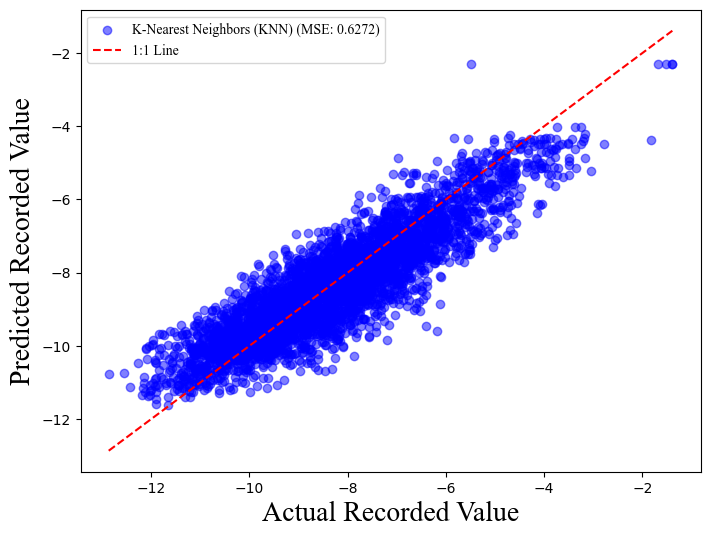

c:\Users\jun_lab\Desktop\code\Punching-shear\venv\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


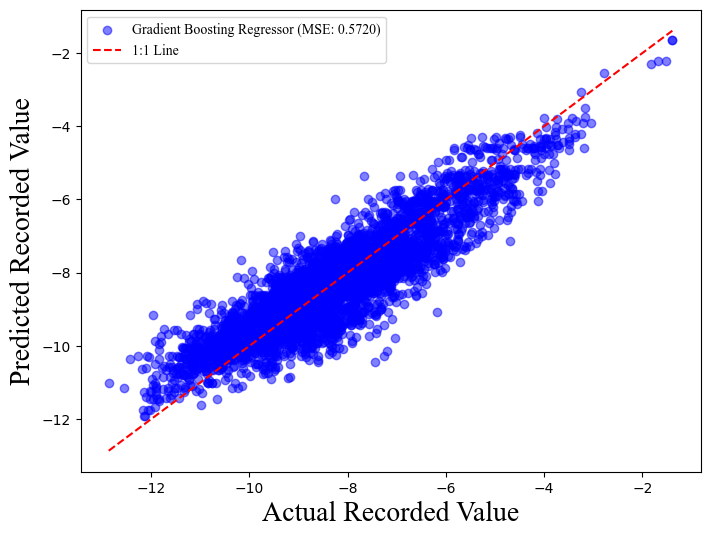

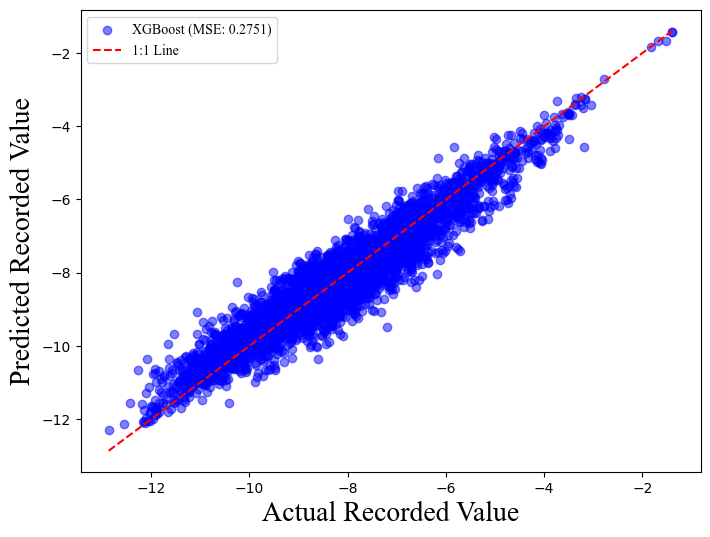

{'Linear Regression': 0.8116069367048608, 'Support Vector Regressor (SVR)': 2.0180987822244423, 'Decision Tree Regressor': 0.0010581933463244858, 'K-Nearest Neighbors (KNN)': 0.6271581699952027, 'Gradient Boosting Regressor': 0.5720069129592992, 'XGBoost': 0.27512550354003906}


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# 파일 경로 지정
file_path = '통합 문서1.xlsx'  # 파일 경로를 실제 파일 경로로 변경하세요.
xls = pd.ExcelFile(file_path)

# 데이터 로드
input_data = pd.read_excel(xls, sheet_name='Ground_Motion_Input_Value_M_R')
output_data = pd.read_excel(xls, sheet_name='RECORDED_VALUE_PGA')

# 로그 변환
output_data_log = np.log(output_data)

# 학습에 사용할 입력 데이터(X)와 출력 데이터(y) 준비
X = input_data
y = output_data_log

# XGBoost 모델을 포함한 다양한 모델들 정의
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# MSE 값을 저장할 딕셔너리
mse_values = {}

# 각 모델을 학습하고 예측 후 MSE 계산
for model_name, model in models.items():
    model.fit(X, y)  # 로그를 씌운 y 값으로 학습
    predictions = model.predict(X)
    mse_values[model_name] = mean_squared_error(y, predictions)
    
    # 1대1 비교 플롯을 위한 점 추가
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions, label=f'{model_name} (MSE: {mse_values[model_name]:.4f})', color='b', alpha=0.5)
    
    # 1대1 라인 (빨간색 선)
    min_val = min(np.min(y), np.min(predictions))
    max_val = max(np.max(y), np.max(predictions))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', label='1:1 Line', linestyle='--')
    
    # 그래프 디자인 설정
    plt.xlabel('Actual Recorded Value', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Recorded Value', fontsize=20, fontname='Times New Roman')
    plt.legend(fontsize=20, prop={'family': 'Times New Roman'})
    
    # 제목 제외
    plt.show()

# MSE 값 출력
print(mse_values)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm  # 진행 상태 표시용

# 파일 경로 지정
file_path = '통합 문서1.xlsx'  # 파일 경로를 실제 파일 경로로 변경하세요.
xls = pd.ExcelFile(file_path)

# 데이터 로드
input_data = pd.read_excel(xls, sheet_name='Ground_Motion_Input_Value_M_R')
output_data = pd.read_excel(xls, sheet_name='RECORDED_VALUE_PGA')

# 로그 변환
output_data_log = np.log(output_data)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(input_data)  # 입력 데이터를 정규화
y = output_data_log.values  # 출력값

# PyTorch 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # y는 2D로 변환

# GPU 사용 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 더 큰 회귀 모델 정의 (은닉층과 뉴런 수 증가)
class BiggerRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(BiggerRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # 첫 번째 은닉층 (128 뉴런)
        self.bn1 = nn.BatchNorm1d(128)  # 배치 정규화
        self.fc2 = nn.Linear(128, 256)  # 두 번째 은닉층 (256 뉴런)
        self.bn2 = nn.BatchNorm1d(256)  # 배치 정규화
        self.fc3 = nn.Linear(256, 128)  # 세 번째 은닉층 (128 뉴런)
        self.bn3 = nn.BatchNorm1d(128)  # 배치 정규화
        self.fc4 = nn.Linear(128, 64)   # 네 번째 은닉층 (64 뉴런)
        self.bn4 = nn.BatchNorm1d(64)   # 배치 정규화
        self.fc5 = nn.Linear(64, 1)     # 출력층
        self.dropout = nn.Dropout(0.4)  # 드롭아웃 (40% 확률)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)  # 드롭아웃 적용
        x = torch.relu(self.bn2(self.fc2(x)))
        x = torch.relu(self.bn3(self.fc3(x)))
        x = torch.relu(self.bn4(self.fc4(x)))  # 네 번째 은닉층
        x = self.fc5(x)  # 최종 출력
        return x

# 모델 인스턴스화 (입력 차원에 맞춰)
model = BiggerRegressionModel(input_dim=X.shape[1]).to(device)

# 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # MSE 손실 함수 (회귀 문제에 적합)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저

# 학습률 조정 (Learning Rate Scheduler)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

# 학습
epochs = 1000
for epoch in tqdm(range(epochs), desc="Training Progress"):
    model.train()  # 모델을 학습 모드로 설정
    optimizer.zero_grad()  # 경사도 초기화
    outputs = model(X_tensor.to(device))  # 모델 예측 (입력도 GPU로 전송)
    loss = criterion(outputs, y_tensor.to(device))  # 손실 계산 (정답도 GPU로 전송)
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 갱신

    # 학습 상태 출력
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')
    
    # 학습률 스케줄러 호출
    scheduler.step(loss)

# 모델 예측
model.eval()  # 모델을 평가 모드로 설정
predictions = model(X_tensor.to(device)).detach().cpu().numpy()  # 예측값을 numpy 배열로 변환

# MSE 계산
mse_dl = mean_squared_error(y, predictions)

# 1:1 비교 플롯
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, label=f'Regression Model (MSE: {mse_dl:.4f})')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='1:1 Line')
plt.xlabel('Log(Actual Recorded Value (PGA))')
plt.ylabel('Log(Predicted Recorded Value (PGA))')
plt.title('1:1 Comparison: Log(Actual) vs Log(Predicted) - Bigger Regression Model')
plt.legend()
plt.show()

# MSE 출력
print(f'MSE for Bigger Regression Model: {mse_dl:.4f}')


KeyboardInterrupt: 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm  # 진행 상태 표시용

# 파일 경로 지정
file_path = '통합 문서1.xlsx'  # 파일 경로를 실제 파일 경로로 변경하세요.
xls = pd.ExcelFile(file_path)

# 데이터 로드
input_data = pd.read_excel(xls, sheet_name='Ground_Motion_Input_Value_M_R')
output_data = pd.read_excel(xls, sheet_name='RECORDED_VALUE_PGA')

# 로그 변환
output_data_log = np.log(output_data)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(input_data)  # 입력 데이터를 정규화
y = output_data_log.values  # 출력값

# PyTorch 텐서로 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # y는 2D로 변환

# GPU 사용 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 더 큰 회귀 모델 정의 (은닉층과 뉴런 수 증가)
class MuchBiggerRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(MuchBiggerRegressionModel, self).__init__()
        # 입력층부터 시작해서 은닉층과 출력층까지 확장
        self.fc1 = nn.Linear(input_dim, 512)  # 첫 번째 은닉층 (512 뉴런)
        self.bn1 = nn.BatchNorm1d(512)  # 배치 정규화
        self.fc2 = nn.Linear(512, 1024)  # 두 번째 은닉층 (1024 뉴런)
        self.bn2 = nn.BatchNorm1d(1024)  # 배치 정규화
        self.fc3 = nn.Linear(1024, 2048)  # 세 번째 은닉층 (2048 뉴런)
        self.bn3 = nn.BatchNorm1d(2048)  # 배치 정규화
        self.fc4 = nn.Linear(2048, 1024)  # 네 번째 은닉층 (1024 뉴런)
        self.bn4 = nn.BatchNorm1d(1024)  # 배치 정규화
        self.fc5 = nn.Linear(1024, 512)   # 다섯 번째 은닉층 (512 뉴런)
        self.bn5 = nn.BatchNorm1d(512)    # 배치 정규화
        self.fc6 = nn.Linear(512, 1)      # 출력층
        self.dropout = nn.Dropout(0.4)    # 드롭아웃 (40% 확률)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))  # ReLU 활성화 함수
        x = self.dropout(x)  # 드롭아웃 적용
        x = torch.relu(self.bn2(self.fc2(x)))
        x = torch.relu(self.bn3(self.fc3(x)))
        x = torch.relu(self.bn4(self.fc4(x)))
        x = torch.relu(self.bn5(self.fc5(x)))
        x = self.fc6(x)  # 최종 출력
        return x

# 모델 인스턴스화 (입력 차원에 맞춰)
model = MuchBiggerRegressionModel(input_dim=X.shape[1]).to(device)

# 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()  # MSE 손실 함수 (회귀 문제에 적합)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저

# 학습률 조정 (Learning Rate Scheduler)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

# 학습
epochs = 1000
for epoch in tqdm(range(epochs), desc="Training Progress"):
    model.train()  # 모델을 학습 모드로 설정
    optimizer.zero_grad()  # 경사도 초기화
    outputs = model(X_tensor.to(device))  # 모델 예측 (입력도 GPU로 전송)
    loss = criterion(outputs, y_tensor.to(device))  # 손실 계산 (정답도 GPU로 전송)
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 갱신

    # 학습 상태 출력
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')
    
    # 학습률 스케줄러 호출
    scheduler.step(loss)

# 모델 예측
model.eval()  # 모델을 평가 모드로 설정
predictions = model(X_tensor.to(device)).detach().cpu().numpy()  # 예측값을 numpy 배열로 변환

# MSE 계산
mse_dl = mean_squared_error(y, predictions)

# 1:1 비교 플롯
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, label=f'Regression Model (MSE: {mse_dl:.4f})')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='1:1 Line')
plt.xlabel('Log(Actual Recorded Value (PGA))')
plt.ylabel('Log(Predicted Recorded Value (PGA))')
plt.title('1:1 Comparison: Log(Actual) vs Log(Predicted) - Much Bigger Regression Model')
plt.legend()
plt.show()

# MSE 출력
print(f'MSE for Much Bigger Regression Model: {mse_dl:.4f}')


Using device: cpu



KeyboardInterrupt

